## Fall 2018 DSI Analysis: Midpoint

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
All_workshop_data = pd.read_csv('Full_DSI_History.csv')
All_workshop_data['timestamp'] = pd.to_datetime(All_workshop_data['timestamp'])

In [3]:
All_workshop_data.head()

,timestamp,email,do_you_want_to_receive_updates_about_meetings_workshops_and_other_dsi_events,first_name,last_name,gender,is_this_your_first_dsi_event,what_year_are_you_in,how_much_prior_coding_experience_do_you_have,what_subject_best_describes_your_current_major_or_profession,...,raw_studies,academic_standing,study,past_attendance,first_attendance,race,ethnicity,feedback,listserv,code_background
0,2018-10-15 18:07:06,emmett.kendall@ufl.edu,Yes,Emmett,Kendall,Male,No,Sophomore,Less than 1 year,"Formal Sciences (mathematics, logic, statistic...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-15 18:09:23,liszler@ufl.edu,I'm already on the listserv,Levi,Iszler,Male,No,Junior,1-2 years,"Formal Sciences (mathematics, logic, statistic...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-15 18:11:51,aseem.thakker@gmail.com,Yes,Aseem,Thakkar,Male,Yes,Graduate Student,1-2 years,"Technology (computer engineering, computer sci...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-15 18:16:21,meghansavoldy@ufl.edu,I'm already on the listserv,Meghan,Savoldy,Female,No,Senior,Less than 1 year,"Social Studies (psychology, journalism, econom...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-15 18:16:47,raymond.yu@ufl.edu,Yes,Raymond,Yu,Male,Yes,Freshman,1-2 years,"Technology (computer engineering, computer sci...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Fall_workshops = All_workshop_data[All_workshop_data['workshop_type'].str.contains("Fall 2018")]

### Number of Workshops

In [26]:
print("DSI has hosted", Fall_workshops.workshop_type.nunique(), "workshops in the Fall so far")

DSI has hosted 13 workshops in the Fall so far


### Average Attendance 

In [21]:
print("The average attendance for Fall 2018 Workshops is", len(Fall_workshops)*1.0 / Fall_workshops.workshop_type.nunique())

The average attendance for Fall 2018 Workshops is 30.384615384615383


### Number of Unique Attendants

In [22]:
print("The number of unique attendants for Fall 2018 is", Fall_workshops.email.nunique())

The number of unique attendants for Fall 2018 is 224


In [23]:
print("The total number of attendences is",len(Fall_workshops))

The total number of attendences is 395


### Advertising Efficiency

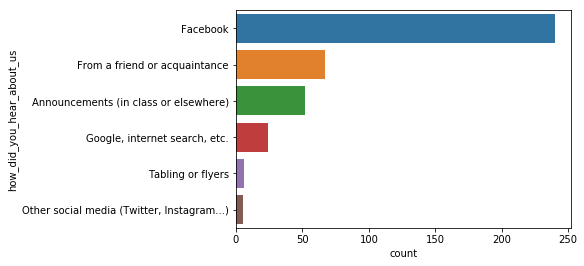

In [5]:
sns.countplot(data=Fall_workshops, y = 'how_did_you_hear_about_us', order = Fall_workshops['how_did_you_hear_about_us'].value_counts().iloc[:10].index)

Facebook is still the major driver, Announcements have made a huge jump compared to previous years. Nicely done!

### Repeat Attendees

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'Histogram of Number of Workshop Attendences by Email')

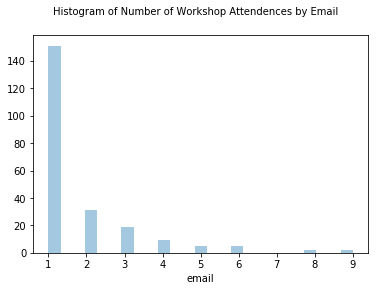

In [6]:
a = sns.distplot(Fall_workshops['email'].value_counts(), kde= False)
fig = a.figure
fig.suptitle("Histogram of Number of Workshop Attendences by Email", size=10)

In [7]:
#congrats to our top attending workshop attendee!
Fall_workshops[Fall_workshops['email'] == Fall_workshops['email'].value_counts().index[0]].head(1)

,timestamp,email,do_you_want_to_receive_updates_about_meetings_workshops_and_other_dsi_events,first_name,last_name,gender,is_this_your_first_dsi_event,what_year_are_you_in,how_much_prior_coding_experience_do_you_have,what_subject_best_describes_your_current_major_or_profession,...,raw_studies,academic_standing,study,past_attendance,first_attendance,race,ethnicity,feedback,listserv,code_background
15,2018-10-15 18:26:08,chingyunhuang@ufl.edu,Yes,Chingyung,huang,Female,No,Graduate Student,Less than 1 year,"Business Administration (finance, accounting, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Year Breakdown

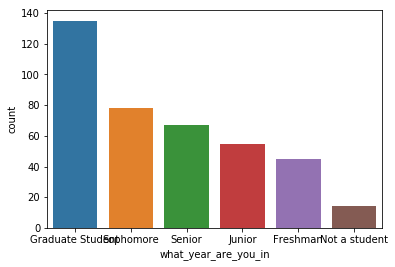

In [8]:
sns.countplot(data=Fall_workshops, x = 'what_year_are_you_in', order = Fall_workshops['what_year_are_you_in'].value_counts().iloc[:10].index)

### Proportion of First Time Attendees per Workshop

#### Same graph but smaller

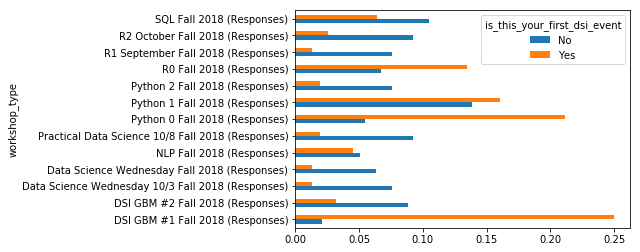

In [10]:
Fall_workshops.groupby('is_this_your_first_dsi_event').workshop_type.value_counts(normalize=True).unstack(0).plot.barh()

### Workshop Attendance by Gender

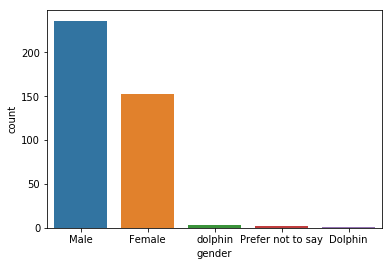

In [11]:
sns.countplot(data = Fall_workshops, x = 'gender')

This ^ is not great and is likely representative of where Data Science is as a field, and also where we get a lot of our attendees from. See that below

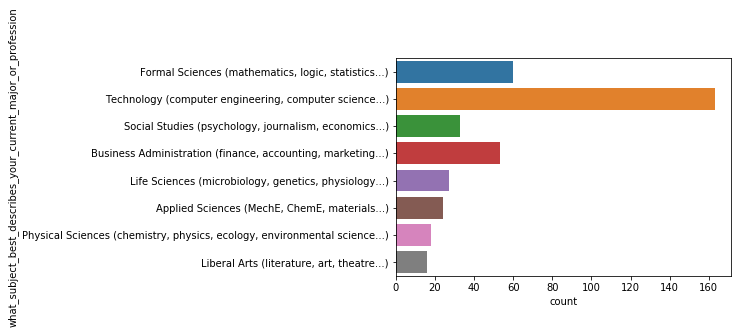

In [13]:
sns.countplot(data = Fall_workshops, y = 'what_subject_best_describes_your_current_major_or_profession')

In [14]:
Fall_workshops

No     238
Yes    156
Name: is_this_your_first_dsi_event, dtype: int64

Overall, this has been a great semester so far and if we can continue our average workshop and DSI Wednesday attendance, we should be in excellent shape!